In [3]:
# Tensorflow logistic regression
import numpy as np
import tensorflow as tf

tf.set_random_seed(0)  # 乱数シード

# weight, bias
w = tf.Variable(tf.zeros([2, 1]))
b = tf.Variable(tf.zeros([1]))

# model y = sigmmoid(w^T*x + b)
# input x
x = tf.placeholder(tf.float32, shape=[None, 2])
# teacher
t = tf.placeholder(tf.float32, shape=[None, 1])
# output y
y = tf.nn.sigmoid(tf.matmul(x, w) + b) 

cross_entropy = - tf.reduce_sum(t * tf.log(y) + (1 - t) * tf.log(1 - y))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)
# 確認
correct_prediction = tf.equal(tf.to_float(tf.greater(y, 0.5)), t)

# OR logic
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [1]])

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for epoch in range(200):
    sess.run(train_step, feed_dict={
            x: X,
            t: Y
        })

classified = correct_prediction.eval(session=sess, feed_dict={
        x: X,
        t: Y
    })
print(classified)

prob = y.eval(session=sess, feed_dict={
        x: X,
        t: Y
    })

print(prob)

# 学習したパラメータの確認
print('w:', sess.run(w))
print('b:', sess.run(b))

[[ True]
 [ True]
 [ True]
 [ True]]
[[ 0.22355038]
 [ 0.91425949]
 [ 0.91425949]
 [ 0.99747425]]
w: [[ 3.61188436]
 [ 3.61188436]]
b: [-1.24509501]


In [4]:
# Keras logistic regression
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

model = Sequential([
    Dense(input_dim=2, units=1),
    Activation('sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.1))
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([[0],[1],[1],[1]])
model.fit(X,Y,epochs=200,batch_size=1)
classes = model.predict_classes(X, batch_size=1)
prob = model.predict_proba(X, batch_size=1)

print('classified')
print(Y == classes)
print()

print('output probability:')
print(prob)

Using TensorFlow backend.


Epoch 1/200
4/4 [==============================] - 0s - loss: 0.6056     
Epoch 2/200
4/4 [==============================] - 0s - loss: 0.5612     
Epoch 3/200
4/4 [==============================] - 0s - loss: 0.5266     
Epoch 4/200
4/4 [==============================] - 0s - loss: 0.5000     
Epoch 5/200
4/4 [==============================] - 0s - loss: 0.4785     
Epoch 6/200
4/4 [==============================] - 0s - loss: 0.4615     
Epoch 7/200
4/4 [==============================] - 0s - loss: 0.4474     
Epoch 8/200
4/4 [==============================] - 0s - loss: 0.4347     
Epoch 9/200
4/4 [==============================] - 0s - loss: 0.4241     
Epoch 10/200
4/4 [==============================] - 0s - loss: 0.4148     
Epoch 11/200
4/4 [==============================] - 0s - loss: 0.4068     
Epoch 12/200
4/4 [==============================] - 0s - loss: 0.3993     
Epoch 13/200
4/4 [==============================] - 0s - loss: 0.3927     
Epoch 14/200
4/4 [================

In [5]:
# Tensorflow Multi Logistic Regression
from sklearn.utils import shuffle

M = 2 # dimension of input
K = 3 # number of class
n = 100 # number of data per class
N = n * K # all data

# sample data
X1 = np.random.randn(n, M) + np.array([0, 10])
X2 = np.random.randn(n, M) + np.array([5, 5])
X3 = np.random.randn(n, M) + np.array([10, 0])
Y1 = np.array([[1,0,0] for _ in range(n)])
Y2 = np.array([[0,1,0] for _ in range(n)])
Y3 = np.array([[0,0,1] for _ in range(n)])

X = np.concatenate((X1, X2, X3), axis=0)
Y = np.concatenate((Y1, Y2, Y3), axis=0)

tf.set_random_seed(0)  # 乱数シード

# weight, bias
w = tf.Variable(tf.zeros([M, K]))
b = tf.Variable(tf.zeros([K]))

# model y = sigmmoid(w^T*x + b)
# input x
x = tf.placeholder(tf.float32, shape=[None, M])
# teacher
t = tf.placeholder(tf.float32, shape=[None, K])
# output y
y = tf.nn.softmax(tf.matmul(x, w) + b) 

cross_entropy = tf.reduce_mean(- tf.reduce_sum(t * tf.log(y), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)
# 確認
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(t,1))

# 初期化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 50
n_batches = N

for epoch in range(20):
    X_, Y_ = shuffle(X, Y)
    for i in range(n_batches):
        start = i * batch_size
        end = start + batch_size
        
        sess.run(train_step, feed_dict={
                x: X_[start:end],
                t: Y_[start:end]
            })
X_,Y_ = shuffle(X,Y)
classified = correct_prediction.eval(session=sess, feed_dict={
        x: X_[0:10],
        t: Y_[0:10]
    })
prob = y.eval(session=sess, feed_dict={
        x: X_[0:10]
    })

print('classified:')
print(classified)
print()
print('output probability:')
print(prob)

classified:
[ True  True  True  True  True  True  True  True  True  True]

output probability:
[[  6.94733373e-08   4.06745449e-02   9.59325373e-01]
 [  9.95563626e-01   4.43641189e-03   1.57395164e-09]
 [  1.91473514e-02   9.76316154e-01   4.53652162e-03]
 [  1.24292384e-07   2.42216885e-02   9.75778162e-01]
 [  7.82159582e-09   2.44917385e-02   9.75508213e-01]
 [  2.37367637e-08   1.10777430e-02   9.88922238e-01]
 [  9.34562907e-02   8.98077309e-01   8.46636761e-03]
 [  9.07453336e-03   9.88724530e-01   2.20088894e-03]
 [  9.64988351e-01   3.50116864e-02   1.72654264e-08]
 [  4.67113637e-09   4.85735806e-03   9.95142698e-01]]


In [6]:
# keras
model = Sequential()
model.add(Dense(input_dim=M, units = K))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.1))

minibatch_size = 50
model.fit(X, Y, epochs=20, batch_size=minibatch_size)

X_, Y_ = shuffle(X, Y)
classes = model.predict_classes(X_[0:10], batch_size=minibatch_size)
prob = model.predict_proba(X_[0:10], batch_size=1)

print('classified:')
print(np.argmax(model.predict(X_[0:10]), axis=1) == classes)
print()
print('output probability:')
print(prob)

Epoch 1/20
300/300 [==============================] - 0s - loss: 2.4623     
Epoch 2/20
300/300 [==============================] - 0s - loss: 0.2569     
Epoch 3/20
300/300 [==============================] - 0s - loss: 0.1679     
Epoch 4/20
300/300 [==============================] - 0s - loss: 0.1281     
Epoch 5/20
300/300 [==============================] - 0s - loss: 0.1052     
Epoch 6/20
300/300 [==============================] - 0s - loss: 0.0914     
Epoch 7/20
300/300 [==============================] - 0s - loss: 0.0804     
Epoch 8/20
300/300 [==============================] - 0s - loss: 0.0733     
Epoch 9/20
300/300 [==============================] - 0s - loss: 0.0663     
Epoch 10/20
300/300 [==============================] - 0s - loss: 0.0614     
Epoch 11/20
300/300 [==============================] - 0s - loss: 0.0569     
Epoch 12/20
300/300 [==============================] - 0s - loss: 0.0532     
Epoch 13/20
300/300 [==============================] - 0s - loss: 0.0504 

C:\Users\maeda\Anaconda3\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


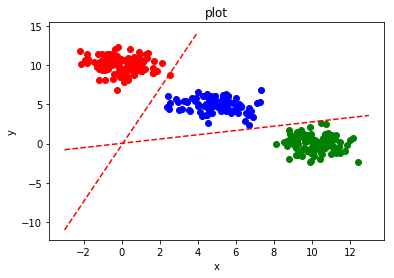

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline 

fig = plt.figure()

ax = fig.add_subplot(1,1,1)

ax.scatter(X1[:,0], X1[:,1], c='red')
ax.scatter(X2[:,0], X2[:,1], c='blue')
ax.scatter(X3[:,0], X3[:,1], c='green')


w11 = sess.run(w)[0][0]
w12 = sess.run(w)[0][1]
b1 = sess.run(b)[0]
linex = np.arange(-3, 5)
liney = - linex * w11 / w12 - b1 * w11 / w12
ax.plot(linex, liney, label='zero/one', color='red', linestyle='--')
linex = np.arange(-3, 5)

w21 = sess.run(w)[1][1]
w22 = sess.run(w)[1][2]
b2 = sess.run(b)[1]
linex = np.arange(-3, 14)
liney = - linex * w21 / w22 - b2 * w21 / w22
ax.plot(linex, liney, label='one/two', color='red', linestyle='--')

ax.set_title('plot')
ax.set_xlabel('x')
ax.set_ylabel('y')

fig.show()

In [1]:
# 線形でXORの分類に失敗する例
import numpy as np
from keras.layers import Dense, Activation
from keras.models import Sequential
from keras.optimizers import SGD

np.random.seed(0)

# XOR
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [0]])

model = Sequential([Dense(input_dim=2, units=1),
                    Activation('sigmoid')])
model.compile(loss='binary_crossentropy', optimizer=SGD(lr=0.1))
model.fit(X, Y, epochs=200, batch_size=1)
prob = model.predict_proba(X, batch_size=1)
print(prob)

Using TensorFlow backend.


Epoch 1/200
1/4 [======>.......................] - ETA: 0s - loss: 0.6256

4/4 [==============================] - 0s - loss: 0.8427     


Epoch 2/200
1/4 [======>.......................] - ETA: 0s - loss: 0.6761

4/4 [==============================] - 0s - loss: 0.8205     


Epoch 3/200
1/4 [======>.......................] - ETA: 0s - loss: 1.4828

4/4 [==============================] - 0s - loss: 0.8049     


Epoch 4/200
1/4 [======>.......................] - ETA: 0s - loss: 0.7562

4/4 [==============================] - 0s - loss: 0.7924     


Epoch 5/200
1/4 [======>.......................] - ETA: 0s - loss: 1.3117

4/4 [==============================] - 0s - loss: 0.7822     


Epoch 6/200
1/4 [======>.......................] - ETA: 0s - loss: 1.2522

4/4 [==============================] - 0s - loss: 0.7754     


Epoch 7/200
1/4 [======>.......................] - ETA: 0s - loss: 0.8351

4/4 [==============================] - 0s - loss: 0.7688     


Epoch 8/200
1/4 [======>.......................] - ETA: 0s - loss: 0.8596

4/4 [==============================] - 0s - loss: 0.7622     


Epoch 9/200
1/4 [======>.......................] - ETA: 0s - loss: 0.5463

2/4 [==============>...............] - ETA: 0s - loss: 0.8017

4/4 [==============================] - 0s - loss: 0.7578     


Epoch 10/200
1/4 [======>.......................] - ETA: 0s - loss: 0.8900

4/4 [==============================] - 0s - loss: 0.7555     


Epoch 11/200
1/4 [======>.......................] - ETA: 0s - loss: 0.9047

4/4 [==============================] - 0s - loss: 0.7520     


Epoch 12/200
1/4 [======>.......................] - ETA: 0s - loss: 0.5293

4/4 [==============================] - 0s - loss: 0.7497     


Epoch 13/200
1/4 [======>.......................] - ETA: 0s - loss: 0.9285

4/4 [==============================] - 0s - loss: 0.7468     


Epoch 14/200
1/4 [======>.......................] - ETA: 0s - loss: 0.9386

4/4 [==============================] - 0s - loss: 0.7454     


Epoch 15/200
1/4 [======>.......................] - ETA: 0s - loss: 0.9453

4/4 [==============================] - 0s - loss: 0.7439     


Epoch 16/200
1/4 [======>.......................] - ETA: 0s - loss: 0.8873

4/4 [==============================] - 0s - loss: 0.7425     


Epoch 17/200
1/4 [======>.......................] - ETA: 0s - loss: 0.5181

4/4 [==============================] - 0s - loss: 0.7422     


Epoch 18/200
1/4 [======>.......................] - ETA: 0s - loss: 0.5137

4/4 [==============================] - 0s - loss: 0.7404     


Epoch 19/200
1/4 [======>.......................] - ETA: 0s - loss: 0.5246

4/4 [==============================] - 0s - loss: 0.7394     


Epoch 20/200
1/4 [======>.......................] - ETA: 0s - loss: 0.9469

4/4 [==============================] - 0s - loss: 0.7393     


Epoch 21/200
1/4 [======>.......................] - ETA: 0s - loss: 0.8377

4/4 [==============================] - 0s - loss: 0.7380     


Epoch 22/200
1/4 [======>.......................] - ETA: 0s - loss: 0.5216

4/4 [==============================] - 0s - loss: 0.7368     


Epoch 23/200
1/4 [======>.......................] - ETA: 0s - loss: 0.9212

4/4 [==============================] - 0s - loss: 0.7371     


Epoch 24/200
1/4 [======>.......................] - ETA: 0s - loss: 0.5474

4/4 [==============================] - 0s - loss: 0.7363     


Epoch 25/200
1/4 [======>.......................] - ETA: 0s - loss: 0.5531

4/4 [==============================] - 0s - loss: 0.7356     


Epoch 26/200


1/4 [======>.......................] - ETA: 0s - loss: 0.9102

4/4 [==============================] - 0s - loss: 0.7348     


Epoch 27/200
1/4 [======>.......................] - ETA: 0s - loss: 0.9069

4/4 [==============================] - 0s - loss: 0.7344     


Epoch 28/200
1/4 [======>.......................] - ETA: 0s - loss: 0.9037

4/4 [==============================] - 0s - loss: 0.7338     


Epoch 29/200
1/4 [======>.......................] - ETA: 0s - loss: 0.8151

4/4 [==============================] - 0s - loss: 0.7328     


Epoch 30/200
1/4 [======>.......................] - ETA: 0s - loss: 0.8907

4/4 [==============================] - 0s - loss: 0.7326     


Epoch 31/200
1/4 [======>.......................] - ETA: 0s - loss: 0.8148

4/4 [==============================] - 0s - loss: 0.7319     


Epoch 32/200
1/4 [======>.......................] - ETA: 0s - loss: 0.5722

4/4 [==============================] - 0s - loss: 0.7317     


Epoch 33/200
1/4 [======>.......................] - ETA: 0s - loss: 0.8145

4/4 [==============================] - 0s - loss: 0.7304     


Epoch 34/200
1/4 [======>.......................] - ETA: 0s - loss: 0.5747

4/4 [==============================] - 0s - loss: 0.7306     


Epoch 35/200
1/4 [======>.......................] - ETA: 0s - loss: 0.5526

4/4 [==============================] - 0s - loss: 0.7304     


Epoch 36/200
1/4 [======>.......................] - ETA: 0s - loss: 0.5847

4/4 [==============================] - 0s - loss: 0.7293     


Epoch 37/200
1/4 [======>.......................] - ETA: 0s - loss: 0.5539

4/4 [==============================] - 0s - loss: 0.7295     


Epoch 38/200
1/4 [======>.......................] - ETA: 0s - loss: 0.5568

4/4 [==============================] - 0s - loss: 0.7281     


Epoch 39/200
1/4 [======>.......................] - ETA: 0s - loss: 0.8492

4/4 [==============================] - 0s - loss: 0.7280     


Epoch 40/200
1/4 [======>.......................] - ETA: 0s - loss: 0.8524

4/4 [==============================] - 0s - loss: 0.7282     


Epoch 41/200
1/4 [======>.......................] - ETA: 0s - loss: 0.7875

4/4 [==============================] - 0s - loss: 0.7276     


Epoch 42/200


1/4 [======>.......................] - ETA: 0s - loss: 0.5666

4/4 [==============================] - 0s - loss: 0.7277     


Epoch 43/200
1/4 [======>.......................] - ETA: 0s - loss: 0.8404

4/4 [==============================] - 0s - loss: 0.7274     


Epoch 44/200
1/4 [======>.......................] - ETA: 0s - loss: 0.5679

4/4 [==============================] - 0s - loss: 0.7270     


Epoch 45/200
1/4 [======>.......................] - ETA: 0s - loss: 0.6157

4/4 [==============================] - 0s - loss: 0.7267     


Epoch 46/200
1/4 [======>.......................] - ETA: 0s - loss: 0.6176

4/4 [==============================] - 0s - loss: 0.7262     


Epoch 47/200
1/4 [======>.......................] - ETA: 0s - loss: 0.5713

4/4 [==============================] - 0s - loss: 0.7251     


Epoch 48/200
1/4 [======>.......................] - ETA: 0s - loss: 0.5769

4/4 [==============================] - 0s - loss: 0.7249     


Epoch 49/200
1/4 [======>.......................] - ETA: 0s - loss: 0.5819

4/4 [==============================] - 0s - loss: 0.7247     


Epoch 50/200
1/4 [======>.......................] - ETA: 0s - loss: 0.5864

4/4 [==============================] - 0s - loss: 0.7244     


Epoch 51/200


1/4 [======>.......................] - ETA: 0s - loss: 0.7946

4/4 [==============================] - 0s - loss: 0.7246     


Epoch 52/200


1/4 [======>.......................] - ETA: 0s - loss: 0.7889

4/4 [==============================] - 0s - loss: 0.7250     


Epoch 53/200
1/4 [======>.......................] - ETA: 0s - loss: 0.7898

4/4 [==============================] - 0s - loss: 0.7246     


Epoch 54/200
1/4 [======>.......................] - ETA: 0s - loss: 0.7807

4/4 [==============================] - 0s - loss: 0.7242     


Epoch 55/200


1/4 [======>.......................] - ETA: 0s - loss: 0.7833

4/4 [==============================] - 0s - loss: 0.7241     


Epoch 56/200
1/4 [======>.......................] - ETA: 0s - loss: 0.5977

4/4 [==============================] - 0s - loss: 0.7242     


Epoch 57/200


1/4 [======>.......................] - ETA: 0s - loss: 0.7871

4/4 [==============================] - 0s - loss: 0.7233     


Epoch 58/200
1/4 [======>.......................] - ETA: 0s - loss: 0.5947

4/4 [==============================] - 0s - loss: 0.7237     


Epoch 59/200


1/4 [======>.......................] - ETA: 0s - loss: 0.5975

4/4 [==============================] - 0s - loss: 0.7235     


Epoch 60/200
1/4 [======>.......................] - ETA: 0s - loss: 0.6413

4/4 [==============================] - 0s - loss: 0.7228     


Epoch 61/200


1/4 [======>.......................] - ETA: 0s - loss: 0.5961

4/4 [==============================] - 0s - loss: 0.7232     


Epoch 62/200
1/4 [======>.......................] - ETA: 0s - loss: 0.5993

4/4 [==============================] - 0s - loss: 0.7231     


Epoch 63/200
1/4 [======>.......................] - ETA: 0s - loss: 0.6021

4/4 [==============================] - 0s - loss: 0.7229     


Epoch 64/200


1/4 [======>.......................] - ETA: 0s - loss: 0.7466

4/4 [==============================] - 0s - loss: 0.7224     


Epoch 65/200
1/4 [======>.......................] - ETA: 0s - loss: 0.6469

4/4 [==============================] - 0s - loss: 0.7225     


Epoch 66/200


1/4 [======>.......................] - ETA: 0s - loss: 0.6059

4/4 [==============================] - 0s - loss: 0.7215     


Epoch 67/200
1/4 [======>.......................] - ETA: 0s - loss: 0.6466

4/4 [==============================] - 0s - loss: 0.7224     


Epoch 68/200
1/4 [======>.......................] - ETA: 0s - loss: 0.7523

4/4 [==============================] - 0s - loss: 0.7219     


Epoch 69/200
1/4 [======>.......................] - ETA: 0s - loss: 0.7548

4/4 [==============================] - 0s - loss: 0.7218     


Epoch 70/200
1/4 [======>.......................] - ETA: 0s - loss: 0.6171

4/4 [==============================] - 0s - loss: 0.7221     


Epoch 71/200
1/4 [======>.......................] - ETA: 0s - loss: 0.6166

4/4 [==============================] - 0s - loss: 0.7220     


Epoch 72/200
1/4 [======>.......................] - ETA: 0s - loss: 0.7598

4/4 [==============================] - 0s - loss: 0.7219     


Epoch 73/200


1/4 [======>.......................] - ETA: 0s - loss: 0.6543

4/4 [==============================] - 0s - loss: 0.7211     


Epoch 74/200
1/4 [======>.......................] - ETA: 0s - loss: 0.7367

4/4 [==============================] - 0s - loss: 0.7210     


Epoch 75/200


1/4 [======>.......................] - ETA: 0s - loss: 0.7445

4/4 [==============================] - 0s - loss: 0.7213     


Epoch 76/200
1/4 [======>.......................] - ETA: 0s - loss: 0.6545

4/4 [==============================] - 0s - loss: 0.7216     


Epoch 77/200


1/4 [======>.......................] - ETA: 0s - loss: 0.6249

4/4 [==============================] - 0s - loss: 0.7205     


Epoch 78/200
1/4 [======>.......................] - ETA: 0s - loss: 0.7445

4/4 [==============================] - 0s - loss: 0.7213     


Epoch 79/200
1/4 [======>.......................] - ETA: 0s - loss: 0.7451

4/4 [==============================] - 0s - loss: 0.7214     


Epoch 80/200
1/4 [======>.......................] - ETA: 0s - loss: 0.6576

4/4 [==============================] - 0s - loss: 0.7213     


Epoch 81/200
1/4 [======>.......................] - ETA: 0s - loss: 0.7459

4/4 [==============================] - 0s - loss: 0.7205     


Epoch 82/200
1/4 [======>.......................] - ETA: 0s - loss: 0.7508

4/4 [==============================] - 0s - loss: 0.7204     


Epoch 83/200
1/4 [======>.......................] - ETA: 0s - loss: 0.7553

4/4 [==============================] - 0s - loss: 0.7210     


Epoch 84/200
1/4 [======>.......................] - ETA: 0s - loss: 0.7234

4/4 [==============================] - 0s - loss: 0.7206     


Epoch 85/200


1/4 [======>.......................] - ETA: 0s - loss: 0.6311

4/4 [==============================] - 0s - loss: 0.7209     


Epoch 86/200
1/4 [======>.......................] - ETA: 0s - loss: 0.6311

4/4 [==============================] - 0s - loss: 0.7208     


Epoch 87/200
1/4 [======>.......................] - ETA: 0s - loss: 0.6743

4/4 [==============================] - 0s - loss: 0.7206     


Epoch 88/200
1/4 [======>.......................] - ETA: 0s - loss: 0.6306

4/4 [==============================] - 0s - loss: 0.7207     


Epoch 89/200
1/4 [======>.......................] - ETA: 0s - loss: 0.6336

4/4 [==============================] - 0s - loss: 0.7196     


Epoch 90/200
1/4 [======>.......................] - ETA: 0s - loss: 0.7384

4/4 [==============================] - 0s - loss: 0.7206     


Epoch 91/200


1/4 [======>.......................] - ETA: 0s - loss: 0.7274

4/4 [==============================] - 0s - loss: 0.7198     


Epoch 92/200


1/4 [======>.......................] - ETA: 0s - loss: 0.7344

4/4 [==============================] - 0s - loss: 0.7202     


Epoch 93/200
1/4 [======>.......................] - ETA: 0s - loss: 0.7276

4/4 [==============================] - 0s - loss: 0.7203     


Epoch 94/200
1/4 [======>.......................] - ETA: 0s - loss: 0.7323

4/4 [==============================] - 0s - loss: 0.7197     


Epoch 95/200


1/4 [======>.......................] - ETA: 0s - loss: 0.7205

4/4 [==============================] - 0s - loss: 0.7200     


Epoch 96/200
1/4 [======>.......................] - ETA: 0s - loss: 0.7261

4/4 [==============================] - 0s - loss: 0.7196     


Epoch 97/200
1/4 [======>.......................] - ETA: 0s - loss: 0.7327

4/4 [==============================] - 0s - loss: 0.7200     


Epoch 98/200


1/4 [======>.......................] - ETA: 0s - loss: 0.7216

4/4 [==============================] - 0s - loss: 0.7203     


Epoch 99/200
1/4 [======>.......................] - ETA: 0s - loss: 0.6664

4/4 [==============================] - 0s - loss: 0.7203     


Epoch 100/200
1/4 [======>.......................] - ETA: 0s - loss: 0.7249

4/4 [==============================] - 0s - loss: 0.7195     


Epoch 101/200


1/4 [======>.......................] - ETA: 0s - loss: 0.7309

4/4 [==============================] - 0s - loss: 0.7201     


Epoch 102/200


1/4 [======>.......................] - ETA: 0s - loss: 0.7320

4/4 [==============================] - 0s - loss: 0.7194     


Epoch 103/200


1/4 [======>.......................] - ETA: 0s - loss: 0.6460

4/4 [==============================] - 0s - loss: 0.7190     


Epoch 104/200


1/4 [======>.......................] - ETA: 0s - loss: 0.6794

4/4 [==============================] - 0s - loss: 0.7200     


Epoch 105/200
1/4 [======>.......................] - ETA: 0s - loss: 0.6521

4/4 [==============================] - 0s - loss: 0.7199     


Epoch 106/200
1/4 [======>.......................] - ETA: 0s - loss: 0.6836

4/4 [==============================] - 0s - loss: 0.7193     


Epoch 107/200


1/4 [======>.......................] - ETA: 0s - loss: 0.6494

4/4 [==============================] - 0s - loss: 0.7199     


Epoch 108/200
1/4 [======>.......................] - ETA: 0s - loss: 0.7000

4/4 [==============================] - 0s - loss: 0.7192     


Epoch 109/200


1/4 [======>.......................] - ETA: 0s - loss: 0.6842

4/4 [==============================] - 0s - loss: 0.7197     


Epoch 110/200
1/4 [======>.......................] - ETA: 0s - loss: 0.7102

4/4 [==============================] - 0s - loss: 0.7194     


Epoch 111/200
1/4 [======>.......................] - ETA: 0s - loss: 0.7201

4/4 [==============================] - 0s - loss: 0.7191     


Epoch 112/200


1/4 [======>.......................] - ETA: 0s - loss: 0.6881

4/4 [==============================] - 0s - loss: 0.7198     


Epoch 113/200


1/4 [======>.......................] - ETA: 0s - loss: 0.7234

4/4 [==============================] - 0s - loss: 0.7196     


Epoch 114/200


1/4 [======>.......................] - ETA: 0s - loss: 0.7063

4/4 [==============================] - 0s - loss: 0.7190     


Epoch 115/200


1/4 [======>.......................] - ETA: 0s - loss: 0.7141

4/4 [==============================] - 0s - loss: 0.7190     


Epoch 116/200


1/4 [======>.......................] - ETA: 0s - loss: 0.6764

4/4 [==============================] - 0s - loss: 0.7197     


Epoch 117/200
1/4 [======>.......................] - ETA: 0s - loss: 0.7116

4/4 [==============================] - 0s - loss: 0.7190     


Epoch 118/200
1/4 [======>.......................] - ETA: 0s - loss: 0.7171

4/4 [==============================] - 0s - loss: 0.7196     


Epoch 119/200


1/4 [======>.......................] - ETA: 0s - loss: 0.6862

4/4 [==============================] - 0s - loss: 0.7194     


Epoch 120/200


1/4 [======>.......................] - ETA: 0s - loss: 0.7207

4/4 [==============================] - 0s - loss: 0.7189     


Epoch 121/200
1/4 [======>.......................] - ETA: 0s - loss: 0.7253

4/4 [==============================] - 0s - loss: 0.7196     


Epoch 122/200
1/4 [======>.......................] - ETA: 0s - loss: 0.6926

4/4 [==============================] - 0s - loss: 0.7192     


Epoch 123/200


1/4 [======>.......................] - ETA: 0s - loss: 0.6982

4/4 [==============================] - 0s - loss: 0.7188     


Epoch 124/200
1/4 [======>.......................] - ETA: 0s - loss: 0.7134

4/4 [==============================] - 0s - loss: 0.7194     


Epoch 125/200
1/4 [======>.......................] - ETA: 0s - loss: 0.7133

4/4 [==============================] - 0s - loss: 0.7195     


Epoch 126/200
1/4 [======>.......................] - ETA: 0s - loss: 0.7137

4/4 [==============================] - 0s - loss: 0.7188     


Epoch 127/200


1/4 [======>.......................] - ETA: 0s - loss: 0.6655

4/4 [==============================] - 0s - loss: 0.7195     


Epoch 128/200
1/4 [======>.......................] - ETA: 0s - loss: 0.7012

4/4 [==============================] - 0s - loss: 0.7191     


Epoch 129/200


1/4 [======>.......................] - ETA: 0s - loss: 0.7052

4/4 [==============================] - 0s - loss: 0.7191     


Epoch 130/200
1/4 [======>.......................] - ETA: 0s - loss: 0.7094

4/4 [==============================] - 0s - loss: 0.7193     


Epoch 131/200
1/4 [======>.......................] - ETA: 0s - loss: 0.6718

4/4 [==============================] - 0s - loss: 0.7185     


Epoch 132/200
1/4 [======>.......................] - ETA: 0s - loss: 0.7161

4/4 [==============================] - 0s - loss: 0.7192     


Epoch 133/200
1/4 [======>.......................] - ETA: 0s - loss: 0.6769

4/4 [==============================] - 0s - loss: 0.7188     


Epoch 134/200


1/4 [======>.......................] - ETA: 0s - loss: 0.6837

4/4 [==============================] - 0s - loss: 0.7193     


Epoch 135/200


1/4 [======>.......................] - ETA: 0s - loss: 0.7013

4/4 [==============================] - 0s - loss: 0.7187     


Epoch 136/200


1/4 [======>.......................] - ETA: 0s - loss: 0.6824

4/4 [==============================] - 0s - loss: 0.7187     


Epoch 137/200
1/4 [======>.......................] - ETA: 0s - loss: 0.7002

4/4 [==============================] - 0s - loss: 0.7187     


Epoch 138/200


1/4 [======>.......................] - ETA: 0s - loss: 0.6825

4/4 [==============================] - 0s - loss: 0.7193     


Epoch 139/200


1/4 [======>.......................] - ETA: 0s - loss: 0.7074

4/4 [==============================] - 0s - loss: 0.7187     


Epoch 140/200


1/4 [======>.......................] - ETA: 0s - loss: 0.6797

4/4 [==============================] - 0s - loss: 0.7194     


Epoch 141/200
1/4 [======>.......................] - ETA: 0s - loss: 0.6828

4/4 [==============================] - 0s - loss: 0.7194     


Epoch 142/200
1/4 [======>.......................] - ETA: 0s - loss: 0.7060

4/4 [==============================] - 0s - loss: 0.7190     


Epoch 143/200
1/4 [======>.......................] - ETA: 0s - loss: 0.7086

4/4 [==============================] - 0s - loss: 0.7190     


Epoch 144/200


1/4 [======>.......................] - ETA: 0s - loss: 0.6821

4/4 [==============================] - 0s - loss: 0.7187     


Epoch 145/200
1/4 [======>.......................] - ETA: 0s - loss: 0.7003

4/4 [==============================] - 0s - loss: 0.7190     


Epoch 146/200
1/4 [======>.......................] - ETA: 0s - loss: 0.7023

4/4 [==============================] - 0s - loss: 0.7191     


Epoch 147/200


1/4 [======>.......................] - ETA: 0s - loss: 0.6899

4/4 [==============================] - 0s - loss: 0.7191     


Epoch 148/200


1/4 [======>.......................] - ETA: 0s - loss: 0.6779

4/4 [==============================] - 0s - loss: 0.7193     


Epoch 149/200
1/4 [======>.......................] - ETA: 0s - loss: 0.6771

4/4 [==============================] - 0s - loss: 0.7183     


Epoch 150/200


1/4 [======>.......................] - ETA: 0s - loss: 0.6859

4/4 [==============================] - 0s - loss: 0.7191     


Epoch 151/200


1/4 [======>.......................] - ETA: 0s - loss: 0.6869

4/4 [==============================] - 0s - loss: 0.7186     


Epoch 152/200


1/4 [======>.......................] - ETA: 0s - loss: 0.6779

4/4 [==============================] - 0s - loss: 0.7193     


Epoch 153/200


1/4 [======>.......................] - ETA: 0s - loss: 0.6952

4/4 [==============================] - 0s - loss: 0.7186     


Epoch 154/200


1/4 [======>.......................] - ETA: 0s - loss: 0.6998

4/4 [==============================] - 0s - loss: 0.7193     


Epoch 155/200
1/4 [======>.......................] - ETA: 0s - loss: 0.6748

4/4 [==============================] - 0s - loss: 0.7193     


Epoch 156/200
1/4 [======>.......................] - ETA: 0s - loss: 0.6815

4/4 [==============================] - 0s - loss: 0.7189     


Epoch 157/200
1/4 [======>.......................] - ETA: 0s - loss: 0.7094

4/4 [==============================] - 0s - loss: 0.7191     


Epoch 158/200
1/4 [======>.......................] - ETA: 0s - loss: 0.6940

4/4 [==============================] - 0s - loss: 0.7191     


Epoch 159/200


1/4 [======>.......................] - ETA: 0s - loss: 0.7066

4/4 [==============================] - 0s - loss: 0.7185     


Epoch 160/200
1/4 [======>.......................] - ETA: 0s - loss: 0.6774

4/4 [==============================] - 0s - loss: 0.7192     


Epoch 161/200


1/4 [======>.......................] - ETA: 0s - loss: 0.6959

4/4 [==============================] - 0s - loss: 0.7185     


Epoch 162/200


1/4 [======>.......................] - ETA: 0s - loss: 0.7131

4/4 [==============================] - 0s - loss: 0.7191     


Epoch 163/200


1/4 [======>.......................] - ETA: 0s - loss: 0.6980

4/4 [==============================] - 0s - loss: 0.7191     


Epoch 164/200
1/4 [======>.......................] - ETA: 0s - loss: 0.7143

4/4 [==============================] - 0s - loss: 0.7193     

Epoch 165/200


1/4 [======>.......................] - ETA: 0s - loss: 0.7145

4/4 [==============================] - 0s - loss: 0.7191     


Epoch 166/200


1/4 [======>.......................] - ETA: 0s - loss: 0.6833

4/4 [==============================] - 0s - loss: 0.7189     


Epoch 167/200
1/4 [======>.......................] - ETA: 0s - loss: 0.6931

4/4 [==============================] - 0s - loss: 0.7190     


Epoch 168/200
1/4 [======>.......................] - ETA: 0s - loss: 0.6967

4/4 [==============================] - 0s - loss: 0.7192     


Epoch 169/200


1/4 [======>.......................] - ETA: 0s - loss: 0.6861

4/4 [==============================] - 0s - loss: 0.7185     


Epoch 170/200


1/4 [======>.......................] - ETA: 0s - loss: 0.6906

4/4 [==============================] - 0s - loss: 0.7185     


Epoch 171/200


1/4 [======>.......................] - ETA: 0s - loss: 0.6959

4/4 [==============================] - 0s - loss: 0.7185     


Epoch 172/200
1/4 [======>.......................] - ETA: 0s - loss: 0.6797

4/4 [==============================] - 0s - loss: 0.7182     


Epoch 173/200
1/4 [======>.......................] - ETA: 0s - loss: 0.6846

4/4 [==============================] - 0s - loss: 0.7192     


Epoch 174/200
1/4 [======>.......................] - ETA: 0s - loss: 0.6839

4/4 [==============================] - 0s - loss: 0.7192     


Epoch 175/200
1/4 [======>.......................] - ETA: 0s - loss: 0.6979

4/4 [==============================] - 0s - loss: 0.7190     


Epoch 176/200
1/4 [======>.......................] - ETA: 0s - loss: 0.7010

4/4 [==============================] - 0s - loss: 0.7185     


Epoch 177/200


1/4 [======>.......................] - ETA: 0s - loss: 0.6737

4/4 [==============================] - 0s - loss: 0.7188     


Epoch 178/200


1/4 [======>.......................] - ETA: 0s - loss: 0.6987

4/4 [==============================] - 0s - loss: 0.7190     


Epoch 179/200


1/4 [======>.......................] - ETA: 0s - loss: 0.6840

4/4 [==============================] - 0s - loss: 0.7188     


Epoch 180/200


1/4 [======>.......................] - ETA: 0s - loss: 0.7027

4/4 [==============================] - 0s - loss: 0.7190     


Epoch 181/200


1/4 [======>.......................] - ETA: 0s - loss: 0.6835

4/4 [==============================] - 0s - loss: 0.7188     


Epoch 182/200


1/4 [======>.......................] - ETA: 0s - loss: 0.6948

4/4 [==============================] - 0s - loss: 0.7185     


Epoch 183/200


1/4 [======>.......................] - ETA: 0s - loss: 0.6996

4/4 [==============================] - 0s - loss: 0.7185     


Epoch 184/200


1/4 [======>.......................] - ETA: 0s - loss: 0.6757

4/4 [==============================] - 0s - loss: 0.7188     


Epoch 185/200


1/4 [======>.......................] - ETA: 0s - loss: 0.7067

4/4 [==============================] - 0s - loss: 0.7190     


Epoch 186/200


1/4 [======>.......................] - ETA: 0s - loss: 0.6853

4/4 [==============================] - 0s - loss: 0.7188     


Epoch 187/200


1/4 [======>.......................] - ETA: 0s - loss: 0.6926

4/4 [==============================] - 0s - loss: 0.7185     


Epoch 188/200
1/4 [======>.......................] - ETA: 0s - loss: 0.6843

4/4 [==============================] - 0s - loss: 0.7191     


Epoch 189/200


1/4 [======>.......................] - ETA: 0s - loss: 0.7053

4/4 [==============================] - 0s - loss: 0.7191     


Epoch 190/200
1/4 [======>.......................] - ETA: 0s - loss: 0.7053

4/4 [==============================] - 0s - loss: 0.7185     


Epoch 191/200
1/4 [======>.......................] - ETA: 0s - loss: 0.7005

4/4 [==============================] - 0s - loss: 0.7192     


Epoch 192/200


1/4 [======>.......................] - ETA: 0s - loss: 0.6856

4/4 [==============================] - 0s - loss: 0.7191     


Epoch 193/200
1/4 [======>.......................] - ETA: 0s - loss: 0.6878

4/4 [==============================] - 0s - loss: 0.7191     


Epoch 194/200


1/4 [======>.......................] - ETA: 0s - loss: 0.6865

4/4 [==============================] - 0s - loss: 0.7188     


Epoch 195/200


1/4 [======>.......................] - ETA: 0s - loss: 0.6994

4/4 [==============================] - 0s - loss: 0.7184     


Epoch 196/200


1/4 [======>.......................] - ETA: 0s - loss: 0.6879

4/4 [==============================] - 0s - loss: 0.7191     


Epoch 197/200


1/4 [======>.......................] - ETA: 0s - loss: 0.6899

4/4 [==============================] - 0s - loss: 0.7181     


Epoch 198/200


1/4 [======>.......................] - ETA: 0s - loss: 0.6940

4/4 [==============================] - 0s - loss: 0.7191     


Epoch 199/200
1/4 [======>.......................] - ETA: 0s - loss: 0.6906

4/4 [==============================] - 0s - loss: 0.7184     


Epoch 200/200


1/4 [======>.......................] - ETA: 0s - loss: 0.6860

4/4 [==============================] - 0s - loss: 0.7190     


1/4 [======>.......................] - ETA: 0s

[[ 0.50147235]
 [ 0.50298554]
 [ 0.50041449]
 [ 0.50192779]]


In [6]:
# XOR Tensorflow 
import numpy as np
import tensorflow as tf

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [0]])

x = tf.placeholder(tf.float32, shape=[None, 2])
t = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.truncated_normal([2, 2]))
b = tf.Variable(tf.zeros([2]))
h = tf.nn.sigmoid(tf.matmul(x, W) + b)

V = tf.Variable(tf.truncated_normal([2, 1]))
c = tf.Variable(tf.zeros([1]))
y = tf.nn.sigmoid(tf.matmul(h, V) * c)

cross_entropy = -tf.reduce_sum(t * tf.log(y) + (1 - t) * tf.log(1 - y))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)
correct_prediction = tf.equal(tf.to_float(tf.greater(y, 0.5)), t)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for epoch in range(4000):
    sess.run(train_step, feed_dict={
        x: X,
        t: Y
    })
    if epoch % 1000 == 0:
        print('epoch:', epoch)

classified = correct_prediction.eval(session=sess, feed_dict={
    x: X,
    t: Y

})
prob = y.eval(session=sess, feed_dict={
    x: X
})
print('classified:')
print(classified)
print()
print('output probability:')
print(prob)


epoch: 0


epoch: 1000


epoch: 2000


epoch: 3000


classified:
[[ True]
 [ True]
 [ True]
 [ True]]

output probability:
[[  3.63216066e-04]
 [  9.99456584e-01]
 [  9.99306917e-01]
 [  3.73745366e-04]]
